In [1]:
import pickle
import os

import pandas as pd
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport

from collections import Counter
import sentencepiece as spm

from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline


pd.options.display.max_rows = 50
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
np.set_printoptions(precision=4)

test i train
70% same texts 
there are same criterias as well but same criteria and same text - not

In [2]:
DATA_PATH = "../data/"

train = pd.read_pickle(os.path.join(DATA_PATH, 'train_df.pkl') )
test = pd.read_pickle(os.path.join(DATA_PATH, 'test_df.pkl') )

train.set_index("id", inplace=True)
test.set_index("id", inplace=True)



In [80]:
split_df = pd.read_csv(os.path.join(DATA_PATH, "train_dev.csv"))
split_df.set_index("id", inplace=True)
train = pd.merge(split_df, train, left_index=True, right_index=True,)

In [4]:
train.head()

train_dev  \
id                                               
b811ea46-1bc5-4a18-a64c-7504c382da44       dev   
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3     train   
997ae1ab-93c4-45a9-9bd0-a49b2b952f1f     train   
6890f2f1-bdc1-48cb-bf7f-00944eb37e77       dev   
74a95f04-e440-4af0-850a-eec5a44ba397     train   

                                                                                                                                     html  \
id                                                                                                                                          
b811ea46-1bc5-4a18-a64c-7504c382da44  [b'<!DOCTYPE html>\n<html lang="en" class="preload">\n\n<head prefix="og: http://ogp.me/ns# fb: ...   
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3  [b'<!DOCTYPE html>\n<html lang="en-US">\n  <head>    \n  <!-- Global site tag (gtag.js) - Google...   
997ae1ab-93c4-45a9-9bd0-a49b2b952f1f  [b'<!doctype html>\n<html lang="en-US">\n<head>\n\t<meta charset="utf-8">\n\t<meta http-equiv="x...   
6890f2f1-bdc1-48cb-bf7f-00944eb37e77  [b'<?xml version="1.0" encoding="iso-8859-1"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Trans...   
74a95f04-e440-4af0-850a-eec5a44ba397  [b'\r\n\r\n<!DOCTYPE html>\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head><title>\r...   

                                                                                                                                     text  \
id                                                                                                                                          
b811ea46-1bc5-4a18-a64c-7504c382da44  [Release\n2020\n2019\n2018\n2017\n2020\n2019\n2018\n2017\nBooks\nOverview Top\nStrategy consulti...   
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3  [SAP Integrated Business Planning (IBP)\nSAP Advanced Planning & Optimization (APO)\nPP/DS for S...   
997ae1ab-93c4-45a9-9bd0-a49b2b952f1f  [facebook\ntwitter\nlinkedin\ninstagram\nWelcome\nHow\nLeadership Team\n6th Sense\nLet’s Talk\nA...   
6890f2f1-bdc1-48cb-bf7f-00944eb37e77  [ANDERSON BUSINESS TRAVEL\nSpecialist Independent Business Travel Agent \nTel: 01932 222002 ~ Em...   
74a95f04-e440-4af0-850a-eec5a44ba397  [Amari Ireland Ltd\nStandards\nPeople\nQuality\nService\nCopper, Brass & Bronze\nNickel Alloys\n...   

                                                                                                                                 keywords  \
id                                                                                                                                          
b811ea46-1bc5-4a18-a64c-7504c382da44  [tools, services, projects, incubates, investment, infuse, growing, cultivates, Strategy, delive...   
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3  [budgeting, decision, cycles, closing, Simplification, consolidation, financial, capabilities, g...   
997ae1ab-93c4-45a9-9bd0-a49b2b952f1f                                                                                                   []   
6890f2f1-bdc1-48cb-bf7f-00944eb37e77            [provide, service, financial, arranging, travel, personal, protection, agency, corporate]   
74a95f04-e440-4af0-850a-eec5a44ba397  [independent, centre, forms, copper, bronze, sizes, centres, Ireland, semi, aluminium, service, ...   

                                                                                                                        accepted_function  \
id                                                                                                                                          
b811ea46-1bc5-4a18-a64c-7504c382da44  accounting, bookeeping, auditing, finance, HR, training, recruitment, legal, IT support services...   
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3  IT consultancy, IT support services, IT management and maintenance, ICT services, IT infrastruct...   
997ae1ab-93c4-45a9-9bd0-a49b2b952f1f  general accounting, auditing, book keeping activities, human resource, recruitment, recruitment ...   
6890f2f1-bdc1-48c

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15515 entries, b811ea46-1bc5-4a18-a64c-7504c382da44 to 924c39d3-e66f-43ff-8b30-1d003bc71ab0
Data columns (total 9 columns):
train_dev            15515 non-null object
html                 15515 non-null object
text                 15515 non-null object
keywords             15515 non-null object
accepted_function    15515 non-null object
rejected_function    15515 non-null object
accepted_product     15515 non-null object
rejected_product     15515 non-null object
target               15515 non-null int64
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


In [7]:
profile = ProfileReport(train[['accepted_function',
       'rejected_function', 'accepted_product', 'rejected_product', 'target' ]], title='Pandas Profiling Report', html={'style':{'full_width':True}})

profile.to_widgets()

In [6]:
def str2lst(x):
    try:
        return list(filter(None, [item.strip().lower() for item in x.split(",")]))
    except Exception as e:
        return []

In [7]:
train['accepted_function'] = train['accepted_function'].map(str2lst)
train['rejected_function'] = train['rejected_function'].map(str2lst)
train['accepted_product']  = train['accepted_product'].map(str2lst)
train['rejected_product']  = train['rejected_product'].map(str2lst)
train["words_num"]         = train["text"].map(lambda x: len("".join(x).split()))

In [8]:
test['accepted_function'] = test['accepted_function'].map(str2lst)
test['rejected_function'] = test['rejected_function'].map(str2lst)
test['accepted_product']  = test['accepted_product'].map(str2lst)
test['rejected_product']  = test['rejected_product'].map(str2lst)
test["words_num"]         = test["text"].map(lambda x: len("".join(x).split()))

In [225]:
# display(HTML(train.html.values[10][0].decode("utf-8")))


In [12]:
print("\n\n\n".join(train.text.values[10]))

The Voice of
Toggle main menu visibility
Distributor Login
About Us
Company Information
Norbar Corporate Video
Energy Management - ISO50001
Corporate Social Responsibility
Corporate Compliance
Terms & Conditions
Torque Screwdrivers
Torque Wrenches
Manual Torque Multipliers
Battery Torque Multipliers
Pneumatic Torque Multipliers
Electronic Torque Multipliers
Reaction Accessories
Torque Measurement
Calibration Equipment
Ultrasonic Bolt Measurement
Harsh Environment Range
Engineer to Order
After Sales Service
UKAS Accredited Laboratory
Training Services
Calibration Services
Torque Calibration
Company Compliance
Product Compliance
Calibration Certificates
ISO 6789
Downloads
Catalogues
Manuals
Work Experience
Careers - FAQ
Current Employees
Employee Testimonials
News & Events
How To Find Us
Find a Distributor in your Country
You are here: About Us
About Norbar, world leaders in torque equipment
Cutting edge: Norbar’s state-of-the-art factory facilities ensure we provide the very latest desi

### Keywords intersection with rejected, accepted function and accepted product

In [5]:
train["keywords"] = train["keywords"].map(lambda x: [w.lower() for w in x])

In [9]:
train["keywords_intersect_rejected_f"] = train.apply(
        lambda x: len(set(x["keywords"]).intersection(set(x["rejected_function"]))), axis=1)

train["keywords_intersect_accepted_f"] = train.apply(
        lambda x: len(set(x["keywords"]).intersection(set(x["accepted_function"]))), axis=1)

train["keywords_intersect_accepted_pr"] = train.apply(
        lambda x: len(set(x["keywords"]).intersection(set(x["accepted_product"]))), axis=1)

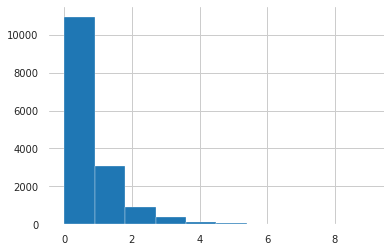

In [10]:
train.keywords_intersect_rejected_f.hist()

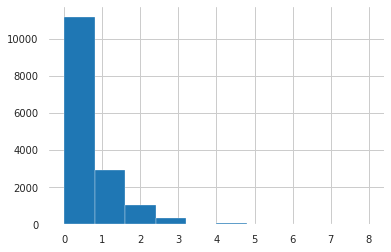

In [11]:
train.keywords_intersect_accepted_f.hist()

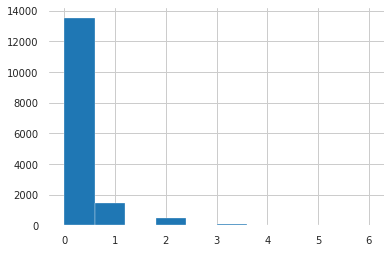

In [12]:
train.keywords_intersect_accepted_pr.hist()

In [11]:
train.text[:2]

id
b811ea46-1bc5-4a18-a64c-7504c382da44    [Release\n2020\n2019\n2018\n2017\n2020\n2019\n2018\n2017\nBooks\nOverview Top\nStrategy consulti...
b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3    [SAP Integrated Business Planning (IBP)\nSAP Advanced Planning & Optimization (APO)\nPP/DS for S...
Name: text, dtype: object

In [184]:
def get_parts(x):
    res = ""
    for w in x:
        if len(w) < 15:
            res += "ERROR_MSG  "
        else:
            res += w[100:] + "  " 
    return res
train["text_merged"] = train.text.map(lambda x: get_parts(x)).values

In [13]:
# train["all_text_tokens"] = train.text.map(lambda x: "".join([w.lower() for w in x]).split())

In [14]:
train["keywords_intersect_all_text"] = train.apply(
        lambda x: len(set(x["keywords"]).intersection(set(x["all_text_tokens"]))), axis=1)

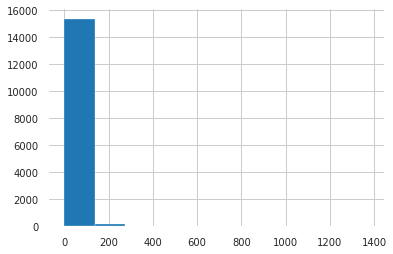

In [15]:
train.keywords_intersect_all_text.hist()

In [16]:
train["keyword_num"] = train.keywords.map(lambda x: len(x))
train["accepted_function_num"] = train.accepted_function.map(lambda x: len(x))
train["rejected_function_num"] = train.rejected_function.map(lambda x: len(x))
train["accepted_product_num"] = train.accepted_product.map(lambda x: len(x))

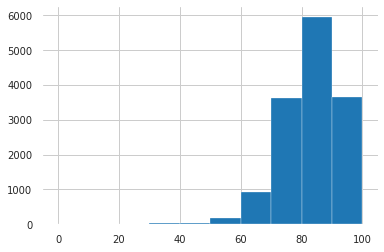

In [17]:
# keywords that are in all text
(train["keywords_intersect_all_text"]* 100 / train["keyword_num"]).hist()

In [35]:
# all_keywords = train.keywords.sum()
# count_keywords = Counter(all_keywords)

count_keywords.most_common()[:-10]

[('services', 6518),
 ('solutions', 5838),
 ('service', 5678),
 ('management', 5409),
 ('products', 4071),
 ('business', 4053),
 ('support', 4044),
 ('development', 3829),
 ('design', 3196),
 ('production', 2974),
 ('product', 2860),
 ('systems', 2803),
 ('technology', 2562),
 ('provide', 2560),
 ('-', 2498),
 ('providing', 2422),
 ('software', 2233),
 ('financial', 2163),
 ('distribution', 2105),
 ('data', 2093),
 ('supply', 2068),
 ('digital', 2000),
 ('delivery', 1989),
 ('industry', 1941),
 ('deliver', 1921),
 ('marketing', 1894),
 ('sales', 1796),
 ('provider', 1783),
 ('network', 1777),
 ('equipment', 1728),
 ('training', 1683),
 ('company', 1616),
 ('market', 1594),
 ('technical', 1570),
 ('offer', 1535),
 ('recruitment', 1526),
 ('quality', 1522),
 ('system', 1503),
 ('customer', 1497),
 ('consulting', 1494),
 ('global', 1493),
 ('consultancy', 1449),
 ('manufacturing', 1402),
 ('delivering', 1372),
 ('provides', 1372),
 ('advice', 1371),
 ('process', 1356),
 ('project', 1352),

In [183]:
all_words_tokens = train.all_tokens_unique.sum()
with open(os.path.join(DATA_PATH,"all_keywords.txt"), "w+") as f:
    f.write("\n".join(all_keywords))

In [37]:
with open(os.path.join(DATA_PATH,"all_keywords.txt"), "r+") as f:
     lines = f.read().splitlines()

In [42]:
counter_all = Counter(lines)
counter_all.most_common()[:35]

[('services', 6518),
 ('solutions', 5838),
 ('service', 5678),
 ('management', 5409),
 ('products', 4071),
 ('business', 4053),
 ('support', 4044),
 ('development', 3829),
 ('design', 3196),
 ('production', 2974),
 ('product', 2860),
 ('systems', 2803),
 ('technology', 2562),
 ('provide', 2560),
 ('-', 2498),
 ('providing', 2422),
 ('software', 2233),
 ('financial', 2163),
 ('distribution', 2105),
 ('data', 2093),
 ('supply', 2068),
 ('digital', 2000),
 ('delivery', 1989),
 ('industry', 1941),
 ('deliver', 1921),
 ('marketing', 1894),
 ('sales', 1796),
 ('provider', 1783),
 ('network', 1777),
 ('equipment', 1728),
 ('training', 1683),
 ('company', 1616),
 ('market', 1594),
 ('technical', 1570),
 ('offer', 1535)]

In [179]:
stop_words =["i", "what", "over", "why", "so", "can", "did", "not",
                "now", "under", "he", "you",
                "herself", "has", "just",
                "where", "too", "only", 
                "myself", "which", "those",
                "after", "few", "whom", "t", "being",
                "if", "theirs", "my", "against", 
                "a", "by", "doing", "it", "how",
                "further", "was", "here", "than", "login", "us", "about"]

In [104]:
# all_words = train.head().all_text_tokens.map(split).sum()
# count_all = Counter(all_words)

In [165]:
def combine_acc_rj_func(x):
    tokens = x["accepted_product"] + x["rejected_product"]    
    combined = []
    for t in tokens:
        t = t.strip()
        if t not in stop_words and len(t)>1:
            combined.append(t)
            
    return " ".join(combined)

train["all_tokens_ac_rj_funk"] = train.apply(lambda x: combine_acc_rj_func(x), axis=1)


def combine_acc_rj_prod(x):
    tokens = x["accepted_function"] + x["rejected_function"]    
    combined = []
    for t in tokens:
        t = t.strip()
        if t not in stop_words and len(t)>1:
            combined.append(t)
            
    return " ".join(combined)

train["all_tokens_ac_rj_prod"] = train.apply(lambda x: combine_acc_rj_prod(x), axis=1)

def combine_text(x):    
    merged = x["text_merged"].split()
    text_to_tokens = merged if len(merged) > 15 else ["ERROR_MSG"]
    
    combined = []
    for t in x["keywords"] + text_to_tokens:
        t = t.strip()
        if t not in stop_words and len(t)>1:
            combined.append(t)
            
    return " ".join(combined)

train["all_tokens_text_kw"] = train.apply(lambda x: combine_text(x), axis=1)


In [185]:
def acc_text(x):
    tokens = (
                 ["[CLS]"] + x["accepted_function"] + x["accepted_product"] + ["[SEP]"] +
                 ["[CLS]"] + x["keywords"] + ["[SEP]"] + x["text_merged"].split()
              )
        
    combined = []
    for t in x["keywords"]:
        t = t.strip()
        if t not in stop_words and len(t)>1:
            combined.append(t)
            
    return " ".join(combined)
    
train["acc_keyw_text"] = train.apply(lambda x: acc_text(x), axis=1)


In [159]:
def combine_all_text(x):
#     print(x)+
    tokens = (["[CLS]"] + x["keywords"] + ["[SEP]"] + 
              ["[CLS]"] + x["accepted_function"] + ["[SEP]"] +
              ["[CLS]"] + x["rejected_function"] + ["[SEP]"] +
              ["[CLS]"] + x["accepted_product"] + ["[SEP]"] +
              ["[CLS]"] + x["rejected_product"] + ["[SEP]"] + x["text_merged"].split())
    
    combined = []
    for t in tokens:
        t = t.strip()
        if t not in stop_words and len(t)>1:
            combined.append(t)
            
    return (" ".join(list(set(combined))))

train["all_tokens_unique"] = train.apply(lambda x: combine_all_text(x), axis=1)

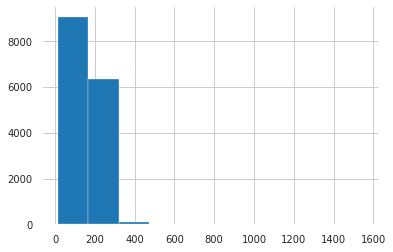

In [92]:
train.all_tokens_unique.str.split().map(len).hist()

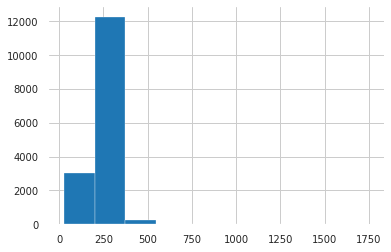

In [161]:
# train.loc["0ea4fb41-d5d8-4086-aceb-ced6665562c1"]["all_tokens_all"]
train.all_tokens_all.str.split().map(len).hist()

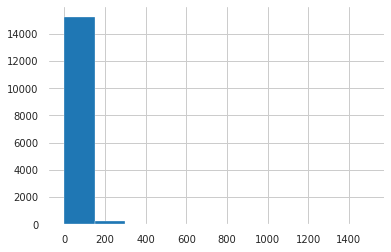

In [186]:
train.acc_keyw_text.str.split().map(len).hist()


In [162]:
all_unique_vocab = set(train.all_tokens_all.str.split().sum())

In [175]:
all_unique_vocab.add("[UNK]")

In [177]:
with open(os.path.join(DATA_PATH,"all_unique_words.txt"), "w+") as f:
    f.write("\n".join([str(body).encode('utf-8', "ignore").decode("utf-8") for body in all_unique_vocab]))

In [126]:
# train["htmls"] = train.html.map(lambda x: "".join([w.decode("utf8",  errors="ignore") for w in x]) )

In [188]:
train[["acc_keyw_text", "all_tokens_unique", 'all_tokens_all', 'all_tokens_ac_rj_funk',
       'all_tokens_ac_rj_prod', 'all_tokens_text_kw'
       ,"train_dev", "target"]].to_pickle("../data/train_all_tokens.pkl")